# Map showing Haro, Rosario and San Juan Channel

Based on Ben's code from: https://github.com/SalishSeaCast/analysis-ben/blob/master/notebooks/Maps.ipynb

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.io import loadmat
from cmocean import cm
import warnings
from cartopy import crs, feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from salishsea_tools import viz_tools, places
import matplotlib.cm as cma

In [9]:
jan18_data = xr.open_dataset('/results2/SalishSea/nowcast-green.202111/01jun18/SalishSea_1d_20180601_20180601_grid_T.nc',mask_and_scale=False)
jan18_sal = jan18_data['vosaline'][0,5]
jan18_sal.shape

(898, 398)

/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/cstang/conda_envs/analysis-camryn/lib/python3.10/site-packages/cartopy/mpl/gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


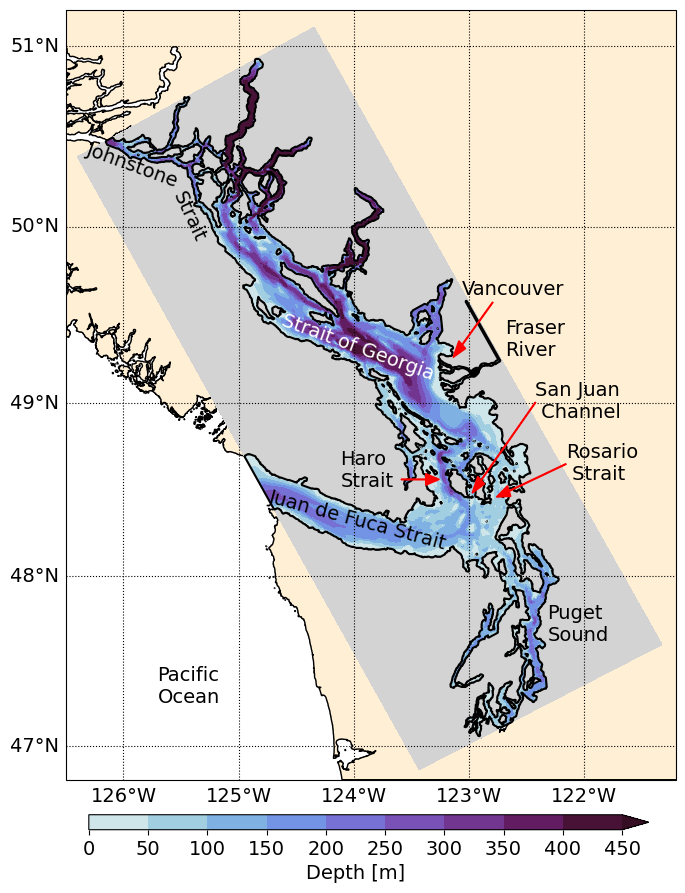

In [159]:
# Increase font size
plt.rcParams['font.size'] = 14

# Load grid and mask files
grid = xr.open_dataset('/data/bmoorema/MEOPAR/grid/bathymetry_202108.nc')
mask = xr.open_dataset('/data/bmoorema/MEOPAR/grid/mesh_mask202108.nc')
tmask = 1 - mask.tmask[0]

# Make plot area
xlim, ylim = [-126.5, -121.2], [46.8, 51.2]
fig, ax = plt.subplots(figsize=(8, 10), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor='papayawhip'))

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, grid.Bathymetry, levels=np.arange(0, 451, 50),
    cmap=cm.dense, extend='max', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,
    )

# # Draw box around domain
# lons, lats = [], []
# corners = (0, 0), (0, -1), (-1, -1), (-1, 0), (0, 0)
# for i in corners: lons.append(grid.nav_lon[i]), lats.append(grid.nav_lat[i])
# ax.plot(lons, lats, 'k-', transform=crs.PlateCarree(), zorder=2)

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines(linestyle=":", color='k', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.xlabels_top, gl.ylabels_right = False, False

# Add annotations
ax.text(0.15, 0.1, 'Pacific\nOcean', transform=ax.transAxes)
ax.text(0.79, 0.18, 'Puget\nSound', transform=ax.transAxes)
ax.text(0.33, 0.30, 'Juan de Fuca Strait', transform=ax.transAxes, rotation=-15)
ax.text(0.35, 0.52, 'Strait of Georgia', transform=ax.transAxes, rotation=-20, color='w')
ax.text(0.03, 0.77, 'Johnstone', transform=ax.transAxes, rotation=-20)
ax.text(0.17, 0.70, 'Strait', transform=ax.transAxes, rotation=-65)
ax.text(0.45, 0.38, 'Haro\nStrait', transform=ax.transAxes)
ax.text(0.72, 0.55, 'Fraser\nRiver', transform=ax.transAxes)
ax.text(0.82, 0.39, 'Rosario\n Strait', transform=ax.transAxes)
ax.text(0.77, 0.47, 'San Juan\n Channel', transform=ax.transAxes)
ax.text(0.65, 0.63, 'Vancouver', transform=ax.transAxes)
ax.arrow(0.55, 0.39, 0.04, 0, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.82, 0.41, -0.093, -0.035, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.77, 0.49, -0.089, -0.101, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)
ax.arrow(0.70, 0.62, -0.05, -0.055, head_width=0.015, edgecolor='r', facecolor='r', transform=ax.transAxes, zorder=10)

# Colorbar
cax = fig.add_axes([0.16, 0.06, 0.7, 0.015])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Depth [m]');

In [50]:
jan18_sal.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

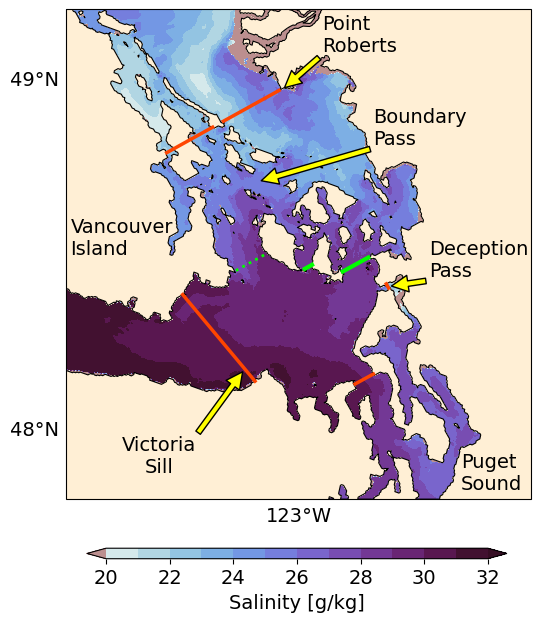

In [158]:
#Plot for boundaries of Ariane runs
import matplotlib.gridspec as gridspec

# Make plot area
xlim, ylim = [-124, -122], [47.8, 49.2]
fig, ax = plt.subplots(figsize=(6, 7), subplot_kw={'projection': crs.Mercator(np.mean(xlim), *ylim)})
ax.set_extent(xlim + ylim)

# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k',lw=0.8, facecolor='papayawhip'))

cmap = cm.dense
cmap.set_bad('papayawhip')
cmap.set_under('rosybrown')
# reversed_cmap = plt.cm.get_cmap('ocean_r')

# Mask NaN values in the data
masked_sal = np.ma.masked_array(jan18_sal, mask=tmask[0])

c = ax.pcolormesh(
    grid.nav_lon, grid.nav_lat,masked_sal, cmap=cmap,
    vmin=20, vmax=32, transform=crs.PlateCarree(), zorder=2,
)

# Overlay bathymetry
c = ax.contourf(
    grid.nav_lon, grid.nav_lat, masked_sal, levels=np.arange(20,33,1),
    cmap=cmap, extend='both', transform=crs.PlateCarree(), zorder=2,
)

# Overlay domain landmask and coastline
for attr, color in zip([ 'contour'], [ 'k']):
    getattr(ax, attr)(
        grid.nav_lon, grid.nav_lat, mask.tmask[0, 0, ...],
        levels=[-0.01, 0.01], colors=color, transform=crs.PlateCarree(), zorder=2,linewidths=0.8
    )
    
# Draw coastline
ax.add_feature(feature.GSHHSFeature('full', edgecolor='grey',lw=0.4, facecolor='papayawhip'))

# Add gridlines
xlocs, ylocs = [np.arange(np.floor(l[0]), np.ceil(l[1])+1) for l in [xlim, ylim]]
gl = ax.gridlines( color='None', draw_labels=True, xlocs=xlocs, ylocs=ylocs)
gl.xformatter, gl.yformatter = LONGITUDE_FORMATTER, LATITUDE_FORMATTER
gl.top_labels, gl.right_labels = False, False

# Colorbar
cax = fig.add_axes([0.16, 0.06, 0.7, 0.015])
fig.colorbar(c, cax=cax, orientation='horizontal', label='Salinity [g/kg]');

# Convert geographic coordinates to Mercator projection - VicSill line
vs_start_x, vs_start_y = ax.projection.transform_point(grid.nav_lon[233,190], grid.nav_lat[233,190], crs.Geodetic())
vs_end_x, vs_end_y = ax.projection.transform_point(grid.nav_lon[303,175], grid.nav_lat[303,175], crs.Geodetic())

# Plot the line on the map
ax.plot([vs_start_x, vs_end_x], [vs_start_y, vs_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - PR line
pr_start_x, pr_start_y = ax.projection.transform_point(grid.nav_lon[386,262], grid.nav_lat[386,262], crs.Geodetic())
pr_end_x, pr_end_y = ax.projection.transform_point(grid.nav_lon[386,308], grid.nav_lat[386,308], crs.Geodetic())

# Plot the line on the map
ax.plot([pr_start_x, pr_end_x], [pr_start_y, pr_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Gulf line
gulf_start_x, gulf_start_y = ax.projection.transform_point(grid.nav_lon[386,215], grid.nav_lat[386,215], crs.Geodetic())
gulf_end_x, gulf_end_y = ax.projection.transform_point(grid.nav_lon[386,253], grid.nav_lat[386,253], crs.Geodetic())

# Plot the line on the map
ax.plot([gulf_start_x, gulf_end_x], [gulf_start_y, gulf_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Admiralty line 
adm_start_x, adm_start_y = ax.projection.transform_point(grid.nav_lon[201,252], grid.nav_lat[201,252], crs.Geodetic())
adm_end_x, adm_end_y = ax.projection.transform_point(grid.nav_lon[201,267], grid.nav_lat[201,267], crs.Geodetic())

# Plot the line on the map
ax.plot([adm_start_x, adm_end_x], [adm_start_y, adm_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Deception 
dec_start_x, dec_start_y = ax.projection.transform_point(grid.nav_lon[244,307], grid.nav_lat[244,307], crs.Geodetic())
dec_end_x, dec_end_y = ax.projection.transform_point(grid.nav_lon[247,307], grid.nav_lat[247,307], crs.Geodetic())

# Plot the line on the map
ax.plot([dec_start_x, dec_end_x], [dec_start_y, dec_end_y], color='orangered',lw=2.5)

# Convert geographic coordinates to Mercator projection - Rosario
ros_start_x, ros_start_y = ax.projection.transform_point(grid.nav_lon[267,284], grid.nav_lat[267,284], crs.Geodetic())
ros_end_x, ros_end_y = ax.projection.transform_point(grid.nav_lon[267,305], grid.nav_lat[267,305], crs.Geodetic())

# Plot the line on the map
ax.plot([ros_start_x, ros_end_x], [ros_start_y, ros_end_y], color='lime',lw=3)

# Convert geographic coordinates to Mercator projection - Haro
haro_start_x, haro_start_y = ax.projection.transform_point(grid.nav_lon[300,217], grid.nav_lat[300,217], crs.Geodetic())
haro_end_x, haro_end_y = ax.projection.transform_point(grid.nav_lon[300,242], grid.nav_lat[300,242], crs.Geodetic())

# Plot the line on the map
ax.plot([haro_start_x, haro_end_x], [haro_start_y, haro_end_y], color='lime',lw=2,ls=':')

# Convert geographic coordinates to Mercator projection - Haro
sjc_start_x, sjc_start_y = ax.projection.transform_point(grid.nav_lon[280,261], grid.nav_lat[280,261], crs.Geodetic())
sjc_end_x, sjc_end_y = ax.projection.transform_point(grid.nav_lon[280,267], grid.nav_lat[280,267], crs.Geodetic())

# Plot the line on the map
ax.plot([sjc_start_x, sjc_end_x], [sjc_start_y, sjc_end_y], color='lime',lw=3)

# # Add annotations

ax.annotate('Point\nRoberts',
            xy=(0.47, 0.84), xycoords='axes fraction',
            xytext=(0.55, 0.99), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.annotate('Deception\nPass',
            xy=(0.7, 0.435), xycoords='axes fraction',
            xytext=(0.78, 0.53), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.annotate('Victoria\nSill',
            xy=(0.38, 0.26), xycoords='axes fraction',
            xytext=(0.2, 0.13), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='center')


ax.annotate('Boundary\nPass',
            xy=(0.42, 0.65), xycoords='axes fraction',
            xytext=(0.66, 0.80), textcoords='axes fraction', fontsize=14,
            arrowprops=dict(facecolor='yellow'),
            verticalalignment='top',horizontalalignment='left')

ax.text(0.01, 0.5, 'Vancouver\nIsland', transform=ax.transAxes)
ax.text(0.85, 0.02, 'Puget\nSound', transform=ax.transAxes);

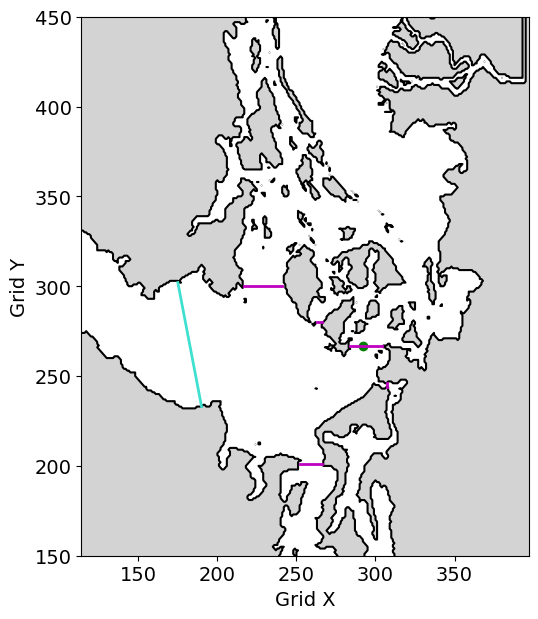

In [10]:
# Fig params
mask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')

#Boundaries
vs_y = np.arange(233,303,1)
vs_x = np.linspace(190,175,len(vs_y))
adm_x = np.arange(252,267,1)
adm_y = np.linspace(201,201,len(adm_x))
dec_y = np.arange(244,247,1)
dec_x = np.linspace(307,307,len(dec_y))
ros_x = np.arange(284,305,1)
ros_y = np.linspace(267,267,len(ros_x))
sjc_x = np.arange(263,267,1)
sjc_y = np.linspace(280,280,len(sjc_x))
haro_x = np.arange(217,242,1)
haro_y = np.linspace(300,300,len(haro_x))

subdomain = [114, 397, 150, 450]
fig = plt.figure(figsize=(8, 7))

ax = fig.add_subplot()
for attr, color in zip(['contourf', 'contour'], ['lightgray', 'k']):
    getattr(ax, attr)(mask.tmask[0, 0, ...],levels=[-0.01,0.01], colors=color) #If 0 -> contour f makes all that are 0 grey. contour makes the transition to 0 black

ax.set_xlim(subdomain[:2])
ax.set_ylim(subdomain[2:])
ax.set_xlabel('Grid X')
ax.set_ylabel('Grid Y')
ax.plot(vs_x,vs_y,color='turquoise',lw=2)
ax.plot(adm_x,adm_y,color='m',lw=2)
ax.plot(dec_x,dec_y,color='m',lw=2)
ax.plot(ros_x,ros_y,color='m',lw=2)
ax.plot(sjc_x,sjc_y,color='m',lw=2)
ax.plot(haro_x,haro_y,color='m',lw=2)
viz_tools.set_aspect(ax)
ax.scatter(292,267,color='g')

